## Observations and Insights 

1. The four most promising treatment regimens were Capomulin, Ramicane, Infubinol, and Ceftamin. Of these regimens, Capomulin and Ramicane showed to have the lowest final tumor volume.
2. The tumor volume for subject s185 was nearly halved as it received the Capumulin treatment regimen.
3. There appears to be a strong positive correlation between the weight of a mouse and its tumor size. This means that mice who have a higher tumor volume suggest that they are likely to also have a higher weight. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. g989
#duplicate_mouse_df.loc[duplicate_mouse_df['Mouse ID'] == 'g989']
mouse_df.loc[mouse_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# Drop mouse - g989
clean_mouse_df = mouse_df[mouse_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame. Now it should be 248 mice...
len(clean_mouse_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# create new df, grouping data by drug type
drug_group_df = clean_mouse_df.groupby('Drug Regimen')

# create variables to calculate summary stats for tumor volume (measured in mm^3)
tumor_mean = drug_group_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_group_df["Tumor Volume (mm3)"].median()
tumor_var = drug_group_df["Tumor Volume (mm3)"].var()
tumor_std = drug_group_df["Tumor Volume (mm3)"].std()
tumor_sem = drug_group_df["Tumor Volume (mm3)"].sem()

# combine data and show table with summary stats
drug_summary_table = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
              "Median Tumor Volume":tumor_median,
              "Variance Tumor Volume":tumor_var,
              "Standard Deviation Tumor Volume":tumor_std,
              "Standard Error Tumor Volume":tumor_sem})

drug_summary_table
#drug_summary_table.sort_values(by='Median Tumor Volume', ascending=False)
#drug_summary_table.sort_values(by='Variance Tumor Volume', ascending=False)

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Meaurement Count per Drug Regimen')

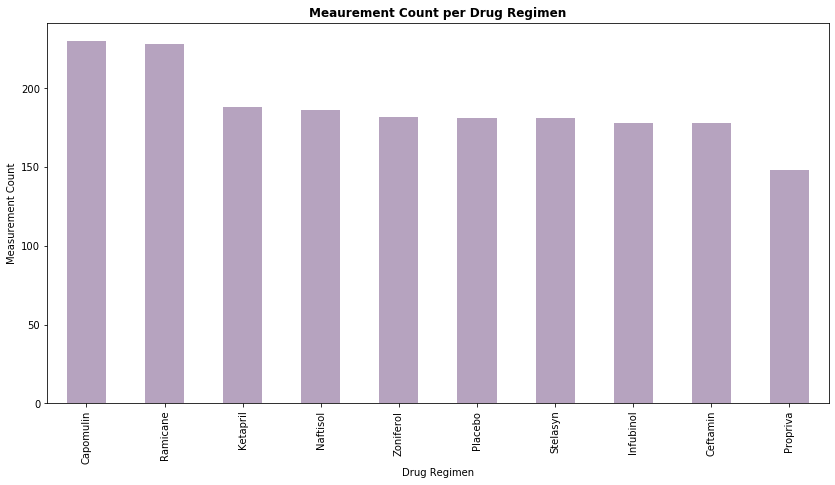

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_plot = clean_mouse_df["Drug Regimen"].value_counts().plot(kind = "bar", figsize=(14,7), facecolor='#b6a3bf')

plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count") 
plt.title("Meaurement Count per Drug Regimen", fontweight = "black")



Text(0.5, 1.0, 'Meaurement Count per Drug Regimen')

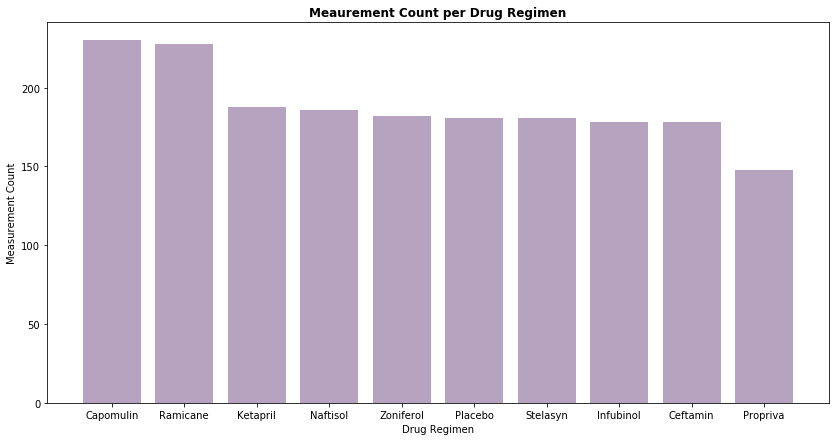

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_plot = clean_mouse_df["Drug Regimen"].value_counts()
plt.figure(figsize=(14,7))
plt.bar(drug_plot.index.values,drug_plot.values, facecolor='#b6a3bf')

plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count") 
plt.title("Meaurement Count per Drug Regimen", fontweight = "black")

In [10]:
# Mice count for each sex
sex_group = clean_mouse_df.groupby('Sex')
sex_counts = sex_group['Mouse ID'].nunique()
sex_counts

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Sex Demographics')

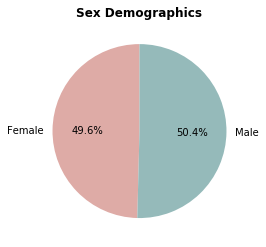

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts.plot.pie(autopct='%1.1f%%', colors=('#deaba6', '#95baba'), startangle=90, 
                    title='Sex Demographics', y=' ')

plt.ylabel(" ") 
plt.title("Sex Demographics", fontweight = "black")

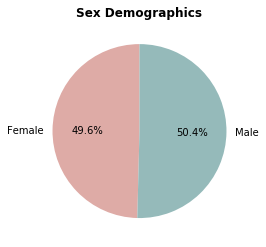

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Counts = [123, 125]
sexes = 'Female','Male'

plt.pie(Counts,labels=sexes,autopct='%1.1f%%', startangle=90, colors=('#deaba6', '#95baba'))
plt.title("Sex Demographics", fontweight = "black")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame({"Timepoint": clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()}).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = max_timepoint_df.merge(clean_mouse_df, on=["Mouse ID", "Timepoint"], how="inner")
merge_df[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen', 'Timepoint']]


,Mouse ID,Tumor Volume (mm3),Drug Regimen,Timepoint
0,a203,67.973419,Infubinol,45
1,a251,65.525743,Infubinol,45
2,a262,70.717621,Placebo,45
3,a275,62.999356,Ceftamin,45
4,a366,63.440686,Stelasyn,30
...,...,...,...,...
243,z435,48.710661,Propriva,10
244,z578,30.638696,Ramicane,45
245,z581,62.754451,Infubinol,45
246,z795,65.741070,Naftisol,45


In [14]:
# strategy... 
# create df for each treatment
# obtain and display quartile data for each treatment
# display box and whisker plot that includes all 4 treatments

### Capomulin Quartile Data

In [15]:
# Calculate the final tumor volume of each mouse for Capomulin
capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
cap_data = capomulin[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
cap_tum_vol = cap_data["Tumor Volume (mm3)"]

#Define the Capomulin quartiles
quartiles = cap_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {cap_tum_vol.min()}")
print(f"Maximum Final Tumor Volume: {cap_tum_vol.max()}")

cap_box = [ tumor_volume for tumor_volume in cap_tum_vol ]

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Minimum Final Tumor Volume: 23.34359787
Maximum Final Tumor Volume: 47.68596303


### Ramicane Quartile Data

In [16]:
# Calculate the final tumor volume of each mouse for Ramicane
ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
ram_data = ramicane[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
ram_tum_vol = ram_data["Tumor Volume (mm3)"]

#Define the Ramicane quartiles
quartiles = ram_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {ram_tum_vol.min()}")
print(f"Maximum Final Tumor Volume: {ram_tum_vol.max()}")

ram_box = [ tumor_volume for tumor_volume in ram_tum_vol ]

The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Minimum Final Tumor Volume: 22.05012627
Maximum Final Tumor Volume: 45.22086888


### Infubinol Quartile Data

In [17]:
# Calculate the final tumor volume of each mouse for Infubinol
infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
inf_data = infubinol[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
inf_tum_vol = inf_data["Tumor Volume (mm3)"]

#Define the Infubinol quartiles
quartiles = inf_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {inf_tum_vol.min()}")
print(f"Maximum Final Tumor Volume: {inf_tum_vol.max()}")

inf_box = [ tumor_volume for tumor_volume in inf_tum_vol ]

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Minimum Final Tumor Volume: 36.321345799999996
Maximum Final Tumor Volume: 72.2267309


### Ceftamin Quartile Data

In [18]:
# Calculate the final tumor volume of each mouse for Ceftamin
ceftamin = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]
cef_data = ceftamin[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]].set_index("Drug Regimen")
cef_tum_vol = cef_data["Tumor Volume (mm3)"]

#Define the Ceftamin quartiles
quartiles = cef_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Minimum Final Tumor Volume: {cef_tum_vol.min()}")
print(f"Maximum Final Tumor Volume: {cef_tum_vol.max()}")

cef_box = [ tumor_volume for tumor_volume in cef_tum_vol ]

The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The the median of Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Minimum Final Tumor Volume: 45.0
Maximum Final Tumor Volume: 68.92318457


### Boxplot

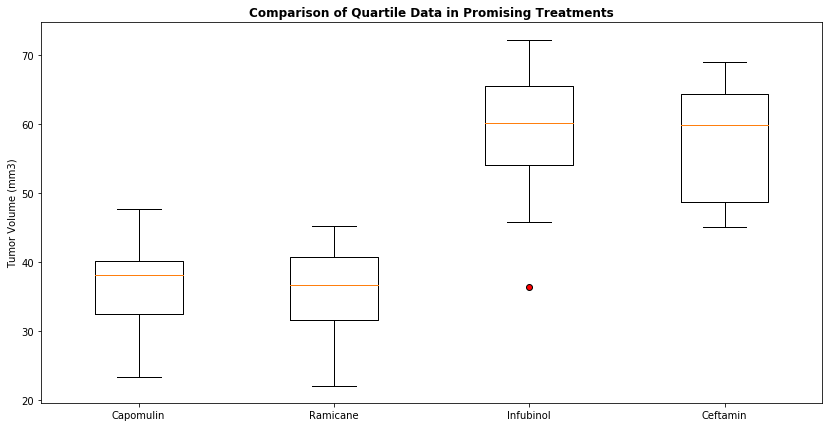

In [19]:
# dataframe with only the four most promising regimens - mouse ID and final tumor volume
first_append = cap_data.append(ram_data)
add_inf = first_append.append(inf_data)
top_four_reg = add_inf.append(cef_data).reset_index()

# how to combine box plots ---> http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/ 
# Get the tumor volume data list for the four chosen drug regimens
top_four = [cap_box, ram_box, inf_box, cef_box]

# List treatment names for labels
drug_regimen = top_four_reg["Drug Regimen"].unique()
treatment_list = [ treatment for treatment in drug_regimen ]

#Create a figure instance
fig = plt.figure(1, figsize= (14,7))

# Create an axes instance
axes = fig.add_subplot(111)

# Create the boxplots and style the outliers
#flierprops argument uses a dictionary with a pair of attributes for styling the outlier markers
axes.boxplot(top_four, flierprops=dict(markerfacecolor='red', marker='.', markersize=12))

#Add boxplot title
axes.set_title("Comparison of Quartile Data in Promising Treatments", fontweight="black")

#Add the axes labels
axes.set_xticklabels(treatment_list)
axes.set_ylabel("Tumor Volume (mm3)")
    
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Timepoints and tumor volume data for a mouse using the Capomulin regimen - pick a mouse
cap_time_pts = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
#pd.set_option('display.max_rows', cap_time_pts.shape[0]+1)
#print(cap_time_pts)

#display timepoints for mouse s185
cap_mouse_s185 = cap_time_pts.loc[cap_time_pts["Mouse ID"] == "s185"]
cap_mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


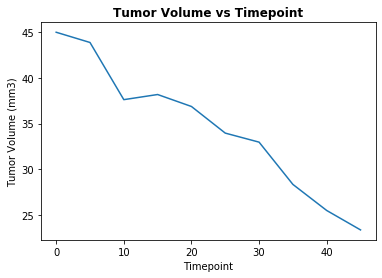

In [21]:
# Line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = cap_mouse_s185["Timepoint"]
y_axis = cap_mouse_s185["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)

plt.title("Tumor Volume vs Timepoint", fontweight = "black")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

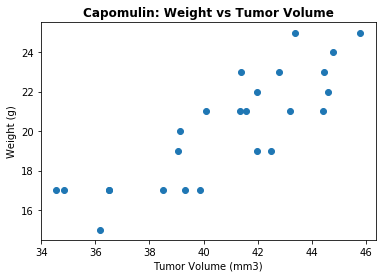

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Obtain weight and calculate average tumor volume data for the Capomulin regimen
cap_data = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
cap_data_avg = cap_data.groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean()

# Capomulin scatter plot - mouse weight versus average tumor volume
mouse_weight = cap_data_avg["Weight (g)"]
tumor_volume = cap_data_avg["Tumor Volume (mm3)"]
plt.scatter(tumor_volume, mouse_weight)

plt.xlabel("Tumor Volume (mm3)") 
plt.ylabel("Weight (g)")
plt.title("Capomulin: Weight vs Tumor Volume", fontweight = "black")
plt.show()


## Correlation and Regression

The correlation between both mouse weight and tumor volume is 0.84
The r-squared is: 0.7088568047708717


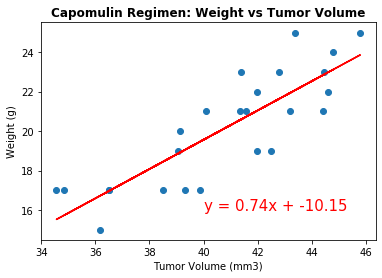

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calcutating the correlation coefficient for mouse weight and average tumor volume
correlation = st.pearsonr(tumor_volume, mouse_weight)

# Calculating the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_volume, mouse_weight)
regress_values = tumor_volume * slope + intercept

# Creating the linear regressing equation to add to the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Capomulin regimen scatter plot of mouse weight versus average tumor volume
plt.scatter(tumor_volume, mouse_weight)

# Adding the linear regression line
plt.plot(tumor_volume,regress_values,"r-")



#Placing the linear regression equation on the plot
plt.annotate(line_eq,(40,16),fontsize=15,color="red")

print(f"The correlation between both mouse weight and tumor volume is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel("Tumor Volume (mm3)") 
plt.ylabel("Weight (g)") 
plt.title("Capomulin Regimen: Weight vs Tumor Volume", fontweight = "black")
plt.show()